<a href="https://colab.research.google.com/github/huangliangc/Scraping_Projects/blob/main/Scraping_Project_2_Kith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scrape multiple pages from Kith

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

**1. Store the pages that we want to scrape in a list.**

In [ ]:
url_list = []
kith_list = ['outerwear', 'footwear']
for i in kith_list:
  url = 'https://kith.com/collections/kith-' + i
  url_list.append(url)

In [ ]:
url_list

['https://kith.com/collections/kith-outerwear',
 'https://kith.com/collections/kith-footwear']

**2. Prepare the column names and the empty dataframe.**

In [ ]:
column_list = ['Product Name', 'Color', 'Price (USD)', 'Type']

In [ ]:
df = pd.DataFrame([], columns = column_list)
df

,Product Name,Color,Price (USD),Type


**3. Write a `for` loop to scrape the `name`, `color`, and `price` of each product. Assign them with different types.**

In [ ]:
w = 0
while w < len(url_list):

  # Prepare thr soup #
  page = requests.get(url_list[w])
  soup = BeautifulSoup(page.text, 'lxml')

  # Find all the name, color, and price sets #
  nested = soup.find('div', class_ = 'collection-layout')

  name = nested.find_all('h1', class_ = 'product-card__title')
  color = nested.find_all('h2', class_ = 'product-card__color')
  price = nested.find_all('span', class_ = "product-card__price")

  # Get all the text in the sets, append them into different empty lists #
  name_list = []
  color_list = []
  price_list = []
  type_list = []

  for i in range(len(name)):
    single_name = name[i].text
    name_list.append(single_name)

  for j in range(len(color)):
    single_color = color[j].text
    color_list.append(single_color)

  for k in range(len(price)):
    single_price = price[k].text.replace('\n', '')
    single_price = single_price.replace('$', '')
    single_price = single_price.replace(',', '')
    price_list.append(single_price)

  for p in range(len(name)):
    if w == 0:
      type_list.append('Outerwear')
    if w == 1:
      type_list.append('Footwear')

  # Use lists to create a dataframe, loop again to the next page #
  dataframe = pd.DataFrame(list(zip(name_list, color_list, price_list, type_list)),
               columns = column_list)
  df = df.append(dataframe)
  w += 1


In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
df["Price (USD)"] = df["Price (USD)"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 21
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  85 non-null     object 
 1   Color         85 non-null     object 
 2   Price (USD)   85 non-null     float64
 3   Type          85 non-null     object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


**4. Sort by the price.**

In [ ]:
df.sort_values(by='Price (USD)', ascending=False)

,Product Name,Color,Price (USD),Type
49,Kith Leather Brighton Overcoat,Black,1250.0,Outerwear
25,Kith Walton Parka with Liner,Black,995.0,Outerwear
24,Kith Walton Parka with Liner,Cypress,995.0,Outerwear
19,Kith for New York Knicks Leather Varsity Jacket,Sandrift,895.0,Outerwear
7,Kith Wool Varsity Jacket,Kindred,795.0,Outerwear
30,Kith Suede Willoughby Chore Jacket,Stadium,795.0,Outerwear
8,Kith Wool Coaches Jacket,Folly,795.0,Outerwear
60,Kith Suede Willoughby Chore Jacket,Space,795.0,Outerwear
6,Kith Wool Coaches Jacket,Black,795.0,Outerwear
5,Kith Wool Varsity Jacket,Loft,795.0,Outerwear


In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
df.groupby(["Color"]).size()

Color
Allure                                   2
Alpine                                   1
Birch                                    1
Black                                   17
Blue / Yellow                            1
Blue Combi                               1
Blue Grey Combi                          1
Briar                                    1
Burgundy                                 1
Canvas                                   2
Channel                                  1
Chestnut                                 2
Cypress                                  1
Dark Indigo                              1
Flagstaff                                3
Folly                                    1
Hallow                                   1
Hazelnut / Burnt Henna / Vanilla Ice     1
Helium                                   1
Indigo                                   1
Inferno                                  1
Ink                                      1
Karat                                    1
Kindl

[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Type')]

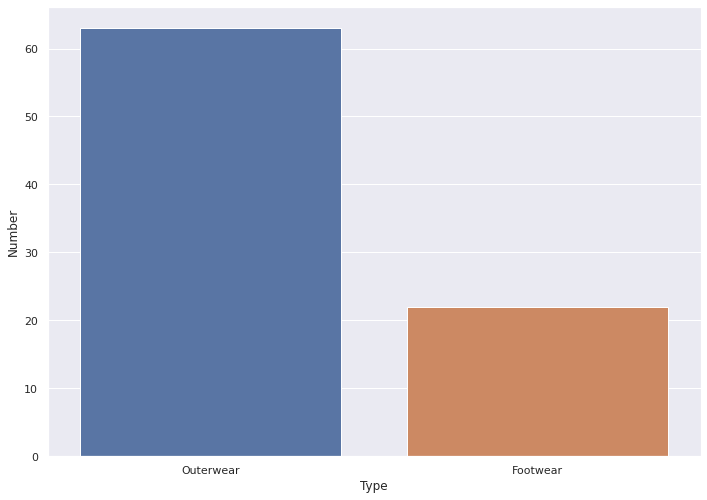

In [ ]:
sns.countplot(x = 'Type', data = df).set(xlabel='Type', ylabel='Number')

In [ ]:
df[df["Type"] == "Outerwear"].describe()

,Price (USD)
count,63.000000
mean,426.349206
std,245.572416
min,225.000000
25%,250.000000
50%,295.000000
75%,572.500000
max,1250.000000


In [ ]:
df[df["Type"] == "Footwear"].describe()

,Price (USD)
count,22.000000
mean,201.363636
std,53.545304
min,95.000000
25%,201.250000
50%,220.000000
75%,230.000000
max,300.000000


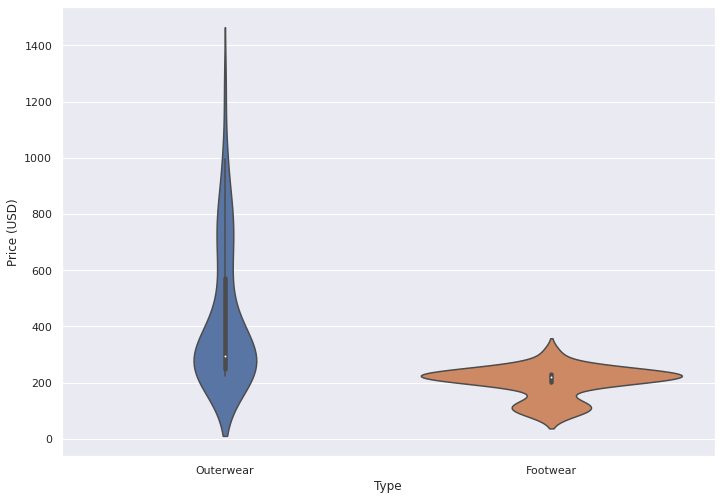

In [ ]:
sns.violinplot(x = 'Type', y = 'Price (USD)', data = df)

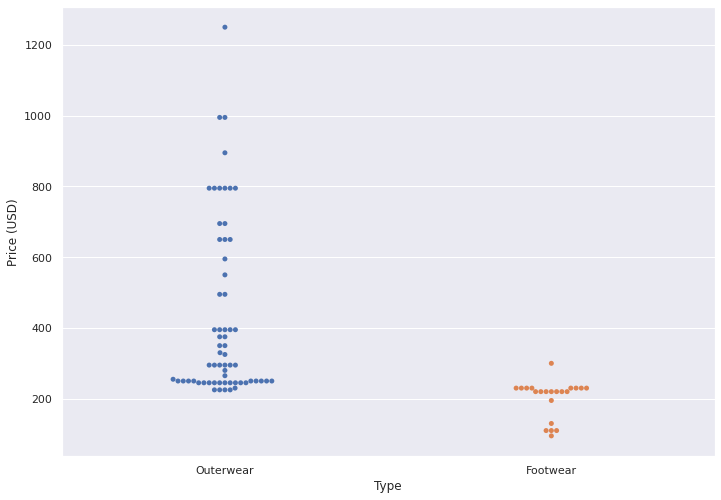

In [ ]:
sns.swarmplot(x = 'Type', y = 'Price (USD)', data = df)

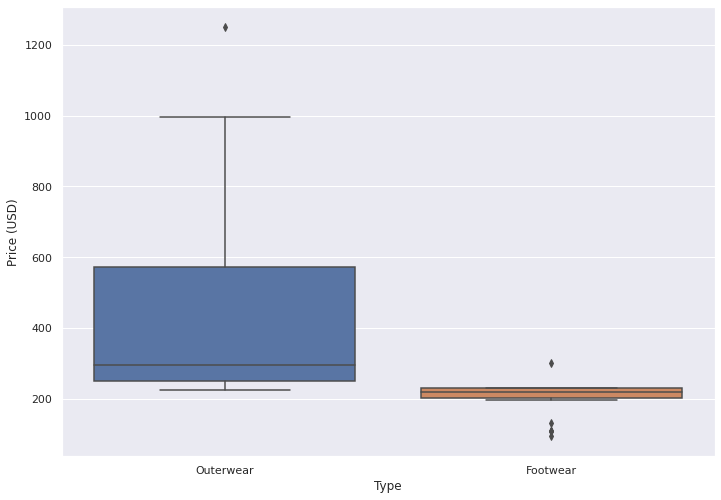

In [ ]:
sns.boxplot(x = 'Type', y = 'Price (USD)', data = df)

In [ ]:
type_logit = []
for i in df["Type"]:
  if i == "Footwear":
    type_logit.append(0)
  else:
    type_logit.append(1)

In [ ]:
df["Type_logit"] = type_logit
df

,Product Name,Color,Price (USD),Type,Type_logit
0,Kith for Needles Double Knit Track Jacket,Black,295.0,Outerwear,1
1,Kith for Marmot Mammoth GORE-TEX® Parka,Lemon Chrome,650.0,Outerwear,1
2,Kith for Marmot Mammoth GORE-TEX® Parka,Black,650.0,Outerwear,1
3,Kith for Marmot Mammoth GORE-TEX® Parka,Trekking Red,650.0,Outerwear,1
4,Kith Griffen Sherpa Coaches Jacket,Chestnut,250.0,Outerwear,1
5,Kith Wool Varsity Jacket,Loft,795.0,Outerwear,1
6,Kith Wool Coaches Jacket,Black,795.0,Outerwear,1
7,Kith Wool Varsity Jacket,Kindred,795.0,Outerwear,1
8,Kith Wool Coaches Jacket,Folly,795.0,Outerwear,1
9,Kith Stiles Knit Trucker Jacket,Hallow,295.0,Outerwear,1


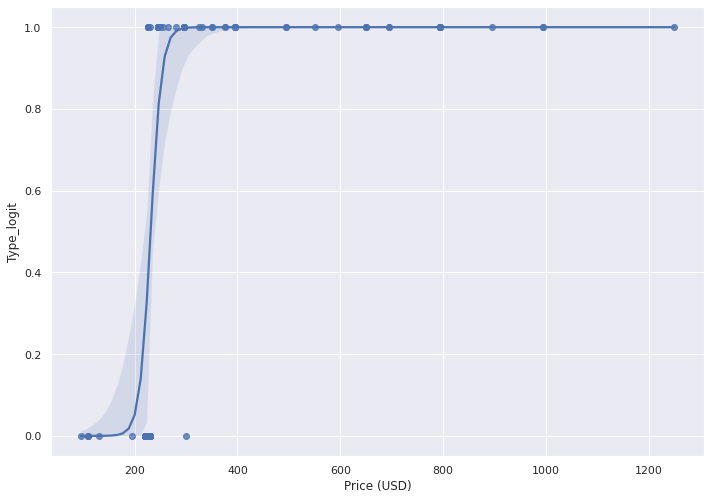

In [ ]:
vis = sns.regplot(x = 'Price (USD)', y = 'Type_logit', data = df, logistic = True)
vis

In [ ]:
import statsmodels.api as sm

#sm.Logit(y,x)

log_reg = sm.Logit(df['Type_logit'], df['Price (USD)']).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.463350
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Type_logit   No. Observations:                   85
Model:                          Logit   Df Residuals:                       84
Method:                           MLE   Df Model:                            0
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                  0.1897
Time:                        16:18:30   Log-Likelihood:                -39.385
converged:                       True   LL-Null:                       -48.605
Covariance Type:            nonrobust   LLR p-value:                       nan
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Price (USD)     0.0045      0.001      4.721      0.000       0.003       0.006
===============================================================================
"""